In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import ast

In [3]:
# Define the path to the correct directory
data_path = Path("C:/Users/arian/OneDrive/Data_Management_UofT/Module_Challenges/Project_4/resources")

In [4]:
# Read the showData.csv file into a DataFrame
show_data_path = data_path / "showData.csv"
show_data = pd.read_csv(show_data_path, converters={'genres': ast.literal_eval, 'production_countries': ast.literal_eval})

# Display the DataFrame
show_data.head(5)

,Unnamed: 0,id,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score
0,0,ts300399,Five Came Back: The Reference Films,1945,TV-MA,51,[documentation],[US],1.0,NaN
1,1,ts22164,Monty Python's Flying Circus,1969,TV-14,30,"[comedy, european]",[GB],4.0,8.8
2,2,ts45948,Monty Python's Fliegender Zirkus,1972,TV-MA,43,[comedy],[],1.0,8.1
3,3,ts20681,Seinfeld,1989,TV-PG,24,[comedy],[US],9.0,8.9
4,4,ts22082,Knight Rider,1982,TV-PG,51,"[scifi, action, crime, drama]",[US],4.0,6.9


In [5]:
# Read the movieData.csv file into a DataFrame
movie_data_path = data_path / "movieData.csv"
movie_data = pd.read_csv(movie_data_path,converters={'genres': ast.literal_eval, 'production_countries': ast.literal_eval})

# Display the DataFrame
movie_data.head(5)

,Unnamed: 0,id,title,release_year,age_certification,runtime,production_countries,imdb_score
0,0,tm84618,Taxi Driver,1976,R,114,[US],8.2
1,1,tm154986,Deliverance,1972,R,109,[US],7.7
2,2,tm127384,Monty Python and the Holy Grail,1975,PG,91,[GB],8.2
3,3,tm120801,The Dirty Dozen,1967,NaN,150,"[GB, US]",7.7
4,4,tm70993,Life of Brian,1979,R,94,[GB],8.0


In [6]:
# Check if any null values exist in both DataFrames
print("show_data missing values:")
print(show_data.isnull().sum())

print("\nmovie_data missing values:")
print(movie_data.isnull().isnull().sum())

show_data missing values:
Unnamed: 0                0
id                        0
title                     0
release_year              0
age_certification       255
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score              167
dtype: int64

movie_data missing values:
Unnamed: 0              0
id                      0
title                   0
release_year            0
age_certification       0
runtime                 0
production_countries    0
imdb_score              0
dtype: int64


In [7]:
# Drop rows with missing values
show_data.dropna(inplace = True)
movie_data.dropna(inplace = True)

# Check that rows with missing values have been dropped
print("Clean Results")
print("show_data missing values:")
print(show_data.isnull().sum())
print("\nmovie_data missing values")
print(movie_data.isnull().sum())

Clean Results
show_data missing values:
Unnamed: 0              0
id                      0
title                   0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
dtype: int64

movie_data missing values
Unnamed: 0              0
id                      0
title                   0
release_year            0
age_certification       0
runtime                 0
production_countries    0
imdb_score              0
dtype: int64


## Distribution of Content By Production Country

In [57]:
# Explode both data sets to unbind production countries
show_data_ex = show_data.explode('production_countries', "imdb_score")
movie_data_ex = movie_data.explode('production_countries', "imdb_score")

#Concatenate to combine movie and show datasets
production_c = pd.concat([show_data_ex['production_countries'].dropna(), show_data_ex['imdb_score'].dropna(), movie_data_ex['production_countries'].dropna(), movie_data_ex['imdb_score'].dropna()])
production_csc = pd.concat([show_data_ex, movie_data_ex])

#Display combined, exploded data
production_csc


,Unnamed: 0,id,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score
0,1,ts22164,Monty Python's Flying Circus,1969,TV-14,30,"[comedy, european]",GB,4.0,8.8
1,2,ts45948,Monty Python's Fliegender Zirkus,1972,TV-MA,43,[comedy],NaN,1.0,8.1
2,3,ts20681,Seinfeld,1989,TV-PG,24,[comedy],US,9.0,8.9
3,4,ts22082,Knight Rider,1982,TV-PG,51,"[scifi, action, crime, drama]",US,4.0,6.9
4,5,ts21715,Thomas & Friends,1984,TV-Y,10,"[animation, family, comedy, fantasy, drama, ac...",GB,24.0,6.5
...,...,...,...,...,...,...,...,...,...,...
1685,3668,tm1120766,Angèle,2021,R,84,NaN,BE,NaN,7.0
1686,3672,tm1160938,Adam by Eve: A Live in Animation,2022,PG-13,58,NaN,JP,NaN,6.1
1687,3701,tm1099320,Convergence: Courage in a Crisis,2021,R,113,NaN,GB,NaN,5.4
1688,3701,tm1099320,Convergence: Courage in a Crisis,2021,R,113,NaN,US,NaN,5.4


In [80]:
# Display Exploded Data On One DataSet
show_data_ex

,Unnamed: 0,id,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score
0,1,ts22164,Monty Python's Flying Circus,1969,TV-14,30,"[comedy, european]",GB,4.0,8.8
1,2,ts45948,Monty Python's Fliegender Zirkus,1972,TV-MA,43,[comedy],NaN,1.0,8.1
2,3,ts20681,Seinfeld,1989,TV-PG,24,[comedy],US,9.0,8.9
3,4,ts22082,Knight Rider,1982,TV-PG,51,"[scifi, action, crime, drama]",US,4.0,6.9
4,5,ts21715,Thomas & Friends,1984,TV-Y,10,"[animation, family, comedy, fantasy, drama, ac...",GB,24.0,6.5
...,...,...,...,...,...,...,...,...,...,...
1801,2095,ts325991,Only Jokes Allowed,2022,TV-MA,16,[comedy],ZA,1.0,4.9
1802,2097,ts270616,We Are: The Brooklyn Saints,2021,TV-14,47,"[documentation, sport]",US,1.0,6.5
1803,2099,ts287729,Alma Matters: Inside the IIT Dream,2021,TV-MA,49,"[documentation, drama]",IN,1.0,8.3
1804,2102,ts288861,Let's Eat,2021,TV-14,60,"[drama, comedy]",TH,1.0,8.2


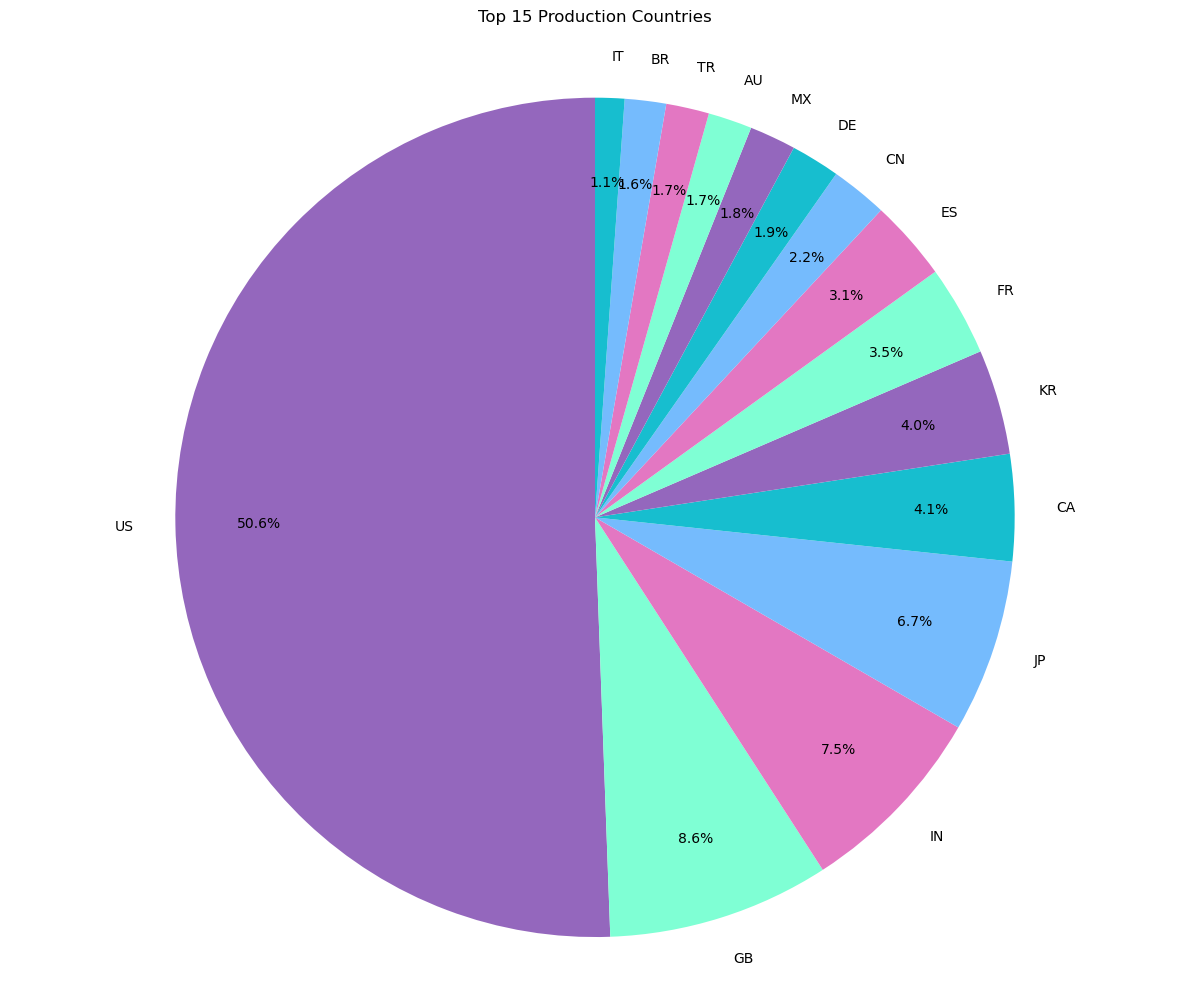

In [12]:
# Count the number of occurences for each country
prod_counts = production_c.value_counts()
prod_counts.head(15)

#Create a variable to hold the top 15
top15 = prod_counts.nlargest(15)

# Create a piechart
plt.figure(figsize = (12, 10))
plt.pie(top15,labels = top15.index, startangle=90, autopct='%1.1f%%', pctdistance=0.80, colors=['tab:purple', 'aquamarine', 'tab:pink', 'xkcd:sky blue', 'tab:cyan'])
plt.axis('equal')
plt.title('Top 15 Production Countries', pad = 25)
plt.tight_layout()
plt.show()

## Countries with Highest IMdB scores

In [72]:
# Groupby dataset by production countries
prodscore = production_csc.groupby(["production_countries"])
prodscore.first()

# Find average score of imdb scores, then find top 20
avgscore = prodscore["imdb_score"].mean()
top20avg = avgscore.nlargest(20)

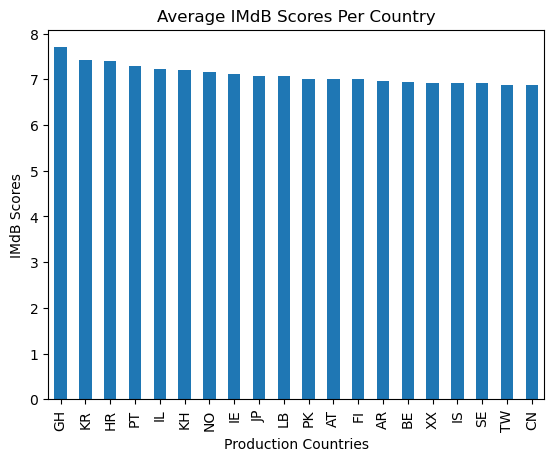

In [79]:
# Plot Top 20 
top20avg.sort_values(ascending=False)[:20].plot.bar(x='production_countries', y='imdb_score')
plt.xlabel("Production Countries")
plt.ylabel("IMdB Scores")
plt.title("Average IMdB Scores Per Country")
plt.show()